In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#importing our csv song db
data = pd.read_csv('songs123.csv')


In [3]:
#drop 1st column
data

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,"Wilkinson, Becky Hill",Here For You,1QgebV92VO4Z7VxbQ1tSKo,0.358,0.780,11,-3.400,0,0.0447,0.175000,0.000620,0.2650,0.0402,173.917,audio_features,spotify:track:1QgebV92VO4Z7VxbQ1tSKo,https://api.spotify.com/v1/tracks/1QgebV92VO4Z...,https://api.spotify.com/v1/audio-analysis/1Qge...,226207,4
1,"Jax Jones, MNEK",Where Did You Go? (feat. MNEK),3sa06xVNmLLYIxdNNmVQN8,0.763,0.782,7,-4.541,0,0.0346,0.182000,0.000007,0.2930,0.5020,127.034,audio_features,spotify:track:3sa06xVNmLLYIxdNNmVQN8,https://api.spotify.com/v1/tracks/3sa06xVNmLLY...,https://api.spotify.com/v1/audio-analysis/3sa0...,177689,4
2,"Joel Corry, Da Hool",The Parade,0B3H6se7MYo3D7BmzfvdVN,0.793,0.886,10,-5.071,0,0.0445,0.000755,0.878000,0.2960,0.2850,124.040,audio_features,spotify:track:0B3H6se7MYo3D7BmzfvdVN,https://api.spotify.com/v1/tracks/0B3H6se7MYo3...,https://api.spotify.com/v1/audio-analysis/0B3H...,158725,4
3,"D.O.D, Carla Monroe",Still Sleepless,4vyG9ZhHT8MKJE5mTICMFC,0.628,0.738,6,-5.045,0,0.0367,0.015600,0.281000,0.1530,0.6990,125.928,audio_features,spotify:track:4vyG9ZhHT8MKJE5mTICMFC,https://api.spotify.com/v1/tracks/4vyG9ZhHT8MK...,https://api.spotify.com/v1/audio-analysis/4vyG...,162879,4
4,"Belters Only, Jazzy",Make Me Feel Good,4CUX44NA1CPEzd0ibMLQsL,0.773,0.740,7,-8.169,0,0.0386,0.062700,0.001830,0.0829,0.5040,124.014,audio_features,spotify:track:4CUX44NA1CPEzd0ibMLQsL,https://api.spotify.com/v1/tracks/4CUX44NA1CPE...,https://api.spotify.com/v1/audio-analysis/4CUX...,197473,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19131,Queen,Dragon Attack - Remastered 2011,32wghPySDJ1mNdqhwW9YMh,0.700,0.867,0,-5.482,1,0.1490,0.139000,0.002750,0.2660,0.5570,88.190,audio_features,spotify:track:32wghPySDJ1mNdqhwW9YMh,https://api.spotify.com/v1/tracks/32wghPySDJ1m...,https://api.spotify.com/v1/audio-analysis/32wg...,258773,4
19132,Mötley Crüe,Smokin' In The Boys Room,2gvgvbokPJZ7Uw5u2m5LeP,0.391,0.938,2,-4.860,1,0.0792,0.001770,0.000001,0.2470,0.6540,134.708,audio_features,spotify:track:2gvgvbokPJZ7Uw5u2m5LeP,https://api.spotify.com/v1/tracks/2gvgvbokPJZ7...,https://api.spotify.com/v1/audio-analysis/2gvg...,208400,4
19133,Bad Company,Master of Ceremony - 2017 Remaster,5H79ukxDuAfIftS0tJO7Zo,0.695,0.468,2,-10.827,0,0.0398,0.049200,0.001870,0.3310,0.8030,84.553,audio_features,spotify:track:5H79ukxDuAfIftS0tJO7Zo,https://api.spotify.com/v1/tracks/5H79ukxDuAfI...,https://api.spotify.com/v1/audio-analysis/5H79...,433027,4
19134,Bad Company,Burnin' Sky - 2017 Remaster,7rNo0ijkYkSkVbi1LL4aO5,0.436,0.532,0,-10.766,1,0.0476,0.308000,0.003950,0.2080,0.8450,190.113,audio_features,spotify:track:7rNo0ijkYkSkVbi1LL4aO5,https://api.spotify.com/v1/tracks/7rNo0ijkYkSk...,https://api.spotify.com/v1/audio-analysis/7rNo...,310867,4


In [4]:
# drop categorical vars
data_num = data.drop(data[['type', 'uri','track_href','analysis_url','duration_ms','artist','title','id','time_signature','mode']], axis=1, inplace=False)

In [5]:
#transforming with standardScaler the data
scaler = StandardScaler()
scaler.fit(data_num)
X_scaled = scaler.transform(data_num)
X_scaled_df = pd.DataFrame(X_scaled, columns = data_num.columns)
display(data_num.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.358,0.780,11,-3.400,0.0447,0.175000,0.000620,0.2650,0.0402,173.917
1,0.763,0.782,7,-4.541,0.0346,0.182000,0.000007,0.2930,0.5020,127.034
2,0.793,0.886,10,-5.071,0.0445,0.000755,0.878000,0.2960,0.2850,124.040
3,0.628,0.738,6,-5.045,0.0367,0.015600,0.281000,0.1530,0.6990,125.928
4,0.773,0.740,7,-8.169,0.0386,0.062700,0.001830,0.0829,0.5040,124.014


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.293406,0.510038,1.590630,0.898507,-0.591579,-0.254109,-0.485967,0.460352,-1.830222,1.725752
1,0.938260,0.517875,0.476949,0.696037,-0.685160,-0.232569,-0.488000,0.637822,-0.017605,0.170663
2,1.103569,0.925358,1.312209,0.601989,-0.593432,-0.790275,2.424184,0.656836,-0.869354,0.071354
3,0.194372,0.345478,0.198529,0.606603,-0.665703,-0.744595,0.444016,-0.249529,0.755642,0.133978
4,0.993363,0.353314,0.476949,0.052252,-0.648099,-0.599665,-0.481953,-0.693839,-0.009755,0.070491


In [6]:
#clustering
kmeans = KMeans(random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [7]:
#assigns songs into clusters
clusters = kmeans.predict(X_scaled_df)

pd.Series(clusters).value_counts().sort_index()

0    2021
1    3666
2    2468
3    1097
4    1762
5    1236
6    4006
7    2880
dtype: int64

In [8]:
#saving to pickle
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_adam.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [9]:
#assign songs to corresponding 
X_scaled_df["cluster"] = clusters


In [10]:
X_scaled_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,-1.293406,0.510038,1.590630,0.898507,-0.591579,-0.254109,-0.485967,0.460352,-1.830222,1.725752,7
1,0.938260,0.517875,0.476949,0.696037,-0.685160,-0.232569,-0.488000,0.637822,-0.017605,0.170663,6
2,1.103569,0.925358,1.312209,0.601989,-0.593432,-0.790275,2.424184,0.656836,-0.869354,0.071354,5
3,0.194372,0.345478,0.198529,0.606603,-0.665703,-0.744595,0.444016,-0.249529,0.755642,0.133978,6
4,0.993363,0.353314,0.476949,0.052252,-0.648099,-0.599665,-0.481953,-0.693839,-0.009755,0.070491,6
...,...,...,...,...,...,...,...,...,...,...,...
19131,0.591112,0.850914,-1.471993,0.529058,0.374807,-0.364883,-0.478902,0.466690,0.198276,-1.117775,1
19132,-1.111567,1.129099,-0.915152,0.639431,-0.271921,-0.787151,-0.488020,0.346264,0.579012,0.425206,7
19133,0.563561,-0.712411,-0.915152,-0.419408,-0.636980,-0.641205,-0.481821,0.878674,1.163854,-1.238413,1
19134,-0.863604,-0.461652,-1.471993,-0.408583,-0.564710,0.155143,-0.474921,0.099073,1.328709,2.262966,7


<h2> Optimizing </h2>

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

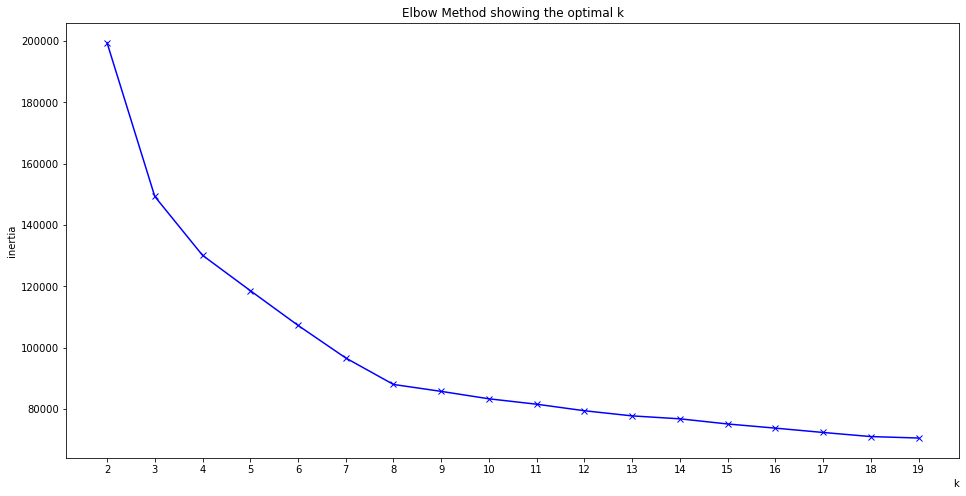

In [11]:
K = range(2, 20)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k', loc='right')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

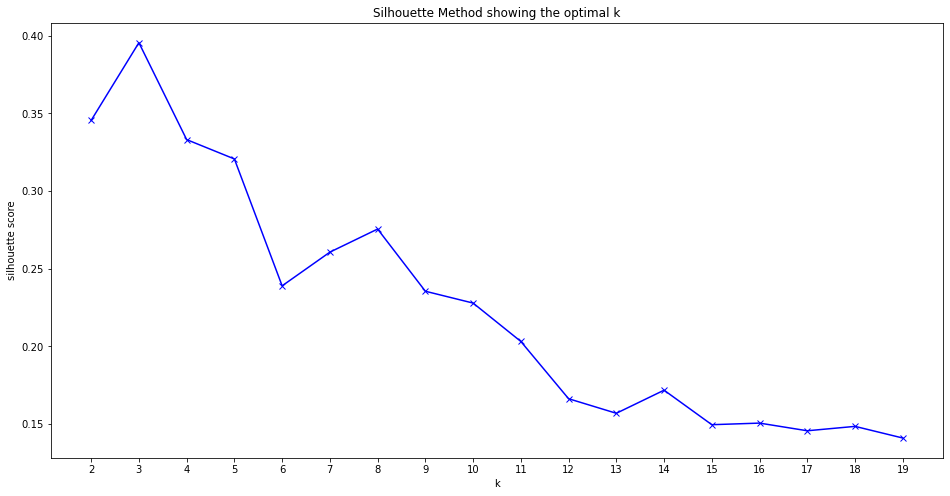

In [12]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

<h2>Merge for our full dataframe</h2>


In [13]:
#making a small df for merge
#little_data = data[['artist','title','id']]

In [14]:
#little_data

,artist,title,id
0,"Wilkinson, Becky Hill",Here For You,1QgebV92VO4Z7VxbQ1tSKo
1,"Jax Jones, MNEK",Where Did You Go? (feat. MNEK),3sa06xVNmLLYIxdNNmVQN8
2,"Joel Corry, Da Hool",The Parade,0B3H6se7MYo3D7BmzfvdVN
3,"D.O.D, Carla Monroe",Still Sleepless,4vyG9ZhHT8MKJE5mTICMFC
4,"Belters Only, Jazzy",Make Me Feel Good,4CUX44NA1CPEzd0ibMLQsL
...,...,...,...
19131,Queen,Dragon Attack - Remastered 2011,32wghPySDJ1mNdqhwW9YMh
19132,Mötley Crüe,Smokin' In The Boys Room,2gvgvbokPJZ7Uw5u2m5LeP
19133,Bad Company,Master of Ceremony - 2017 Remaster,5H79ukxDuAfIftS0tJO7Zo
19134,Bad Company,Burnin' Sky - 2017 Remaster,7rNo0ijkYkSkVbi1LL4aO5


In [15]:
#X_scaled_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,-1.293406,0.510038,1.590630,0.898507,-0.591579,-0.254109,-0.485967,0.460352,-1.830222,1.725752,7
1,0.938260,0.517875,0.476949,0.696037,-0.685160,-0.232569,-0.488000,0.637822,-0.017605,0.170663,6
2,1.103569,0.925358,1.312209,0.601989,-0.593432,-0.790275,2.424184,0.656836,-0.869354,0.071354,5
3,0.194372,0.345478,0.198529,0.606603,-0.665703,-0.744595,0.444016,-0.249529,0.755642,0.133978,6
4,0.993363,0.353314,0.476949,0.052252,-0.648099,-0.599665,-0.481953,-0.693839,-0.009755,0.070491,6
...,...,...,...,...,...,...,...,...,...,...,...
19131,0.591112,0.850914,-1.471993,0.529058,0.374807,-0.364883,-0.478902,0.466690,0.198276,-1.117775,1
19132,-1.111567,1.129099,-0.915152,0.639431,-0.271921,-0.787151,-0.488020,0.346264,0.579012,0.425206,7
19133,0.563561,-0.712411,-0.915152,-0.419408,-0.636980,-0.641205,-0.481821,0.878674,1.163854,-1.238413,1
19134,-0.863604,-0.461652,-1.471993,-0.408583,-0.564710,0.155143,-0.474921,0.099073,1.328709,2.262966,7


In [16]:
#data_joined=X_scaled_df.join(little_data)

In [17]:
# data_joined=X_scaled_df.join(little_data)
# data_rearrange=data_joined[['id','artist','title','danceability', 'energy', 'key', 'loudness', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'cluster']]
# data_rearrange

,id,artist,title,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,1QgebV92VO4Z7VxbQ1tSKo,"Wilkinson, Becky Hill",Here For You,-1.293406,0.510038,1.590630,0.898507,-0.591579,-0.254109,-0.485967,0.460352,-1.830222,1.725752,7
1,3sa06xVNmLLYIxdNNmVQN8,"Jax Jones, MNEK",Where Did You Go? (feat. MNEK),0.938260,0.517875,0.476949,0.696037,-0.685160,-0.232569,-0.488000,0.637822,-0.017605,0.170663,6
2,0B3H6se7MYo3D7BmzfvdVN,"Joel Corry, Da Hool",The Parade,1.103569,0.925358,1.312209,0.601989,-0.593432,-0.790275,2.424184,0.656836,-0.869354,0.071354,5
3,4vyG9ZhHT8MKJE5mTICMFC,"D.O.D, Carla Monroe",Still Sleepless,0.194372,0.345478,0.198529,0.606603,-0.665703,-0.744595,0.444016,-0.249529,0.755642,0.133978,6
4,4CUX44NA1CPEzd0ibMLQsL,"Belters Only, Jazzy",Make Me Feel Good,0.993363,0.353314,0.476949,0.052252,-0.648099,-0.599665,-0.481953,-0.693839,-0.009755,0.070491,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19131,32wghPySDJ1mNdqhwW9YMh,Queen,Dragon Attack - Remastered 2011,0.591112,0.850914,-1.471993,0.529058,0.374807,-0.364883,-0.478902,0.466690,0.198276,-1.117775,1
19132,2gvgvbokPJZ7Uw5u2m5LeP,Mötley Crüe,Smokin' In The Boys Room,-1.111567,1.129099,-0.915152,0.639431,-0.271921,-0.787151,-0.488020,0.346264,0.579012,0.425206,7
19133,5H79ukxDuAfIftS0tJO7Zo,Bad Company,Master of Ceremony - 2017 Remaster,0.563561,-0.712411,-0.915152,-0.419408,-0.636980,-0.641205,-0.481821,0.878674,1.163854,-1.238413,1
19134,7rNo0ijkYkSkVbi1LL4aO5,Bad Company,Burnin' Sky - 2017 Remaster,-0.863604,-0.461652,-1.471993,-0.408583,-0.564710,0.155143,-0.474921,0.099073,1.328709,2.262966,7


In [18]:
#data_rearrange.to_csv("export2.csv")